# Emotions Detection in Text

In [1]:
# EDA
import pandas as pd
import numpy as np
import json
# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv("emotion_dataset_raw.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
with open('intents.json','r') as fp:
    d = json.load(fp)
d

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi',
    'Hey',
    'Is anyone there?',
    'Hi there',
    'Hello',
    'Hey there',
    'Howdy',
    'Hola',
    'Bonjour',
    'Konnichiwa',
    'Guten tag',
    'Ola'],
   'responses': ['Hello there. Tell me how are you feeling today?',
    'Hi there. What brings you here today?',
    'Hi there. How are you feeling today?',
    'Great to see you. How do you feel currently?',
    "Hello there. Glad to see you're back. What's going on in your world right now?"]},
  {'tag': 'morning',
   'patterns': ['Good morning'],
   'responses': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "]},
  {'tag': 'afternoon',
   'patterns': ['Good afternoon'],
   'responses': ['Good afternoon. How is your day going?']},
  {'tag': 'evening',
   'patterns': ['Good evening'],
   'responses': ['Good evening. How has your day been?']},
  {'tag': 'night',
   'patterns': ['Good night'],
   'responses': ['Good night. Get some prop

In [5]:
len(d['intents'])

166

In [6]:
df.columns

Index(['Emotion', 'Text'], dtype='object')

In [9]:
l = ['anxiety','depression','loneliness']
emotion_dict = {}

for intent in d['intents']:
    if intent['tag'] in l:
        if intent['tag'] not in emotion_dict:
            emotion_dict[intent['tag']] = []
            emotion_dict[intent['tag']].extend(intent['responses'])
        else:
            emotion_dict[intent['tag']].extend(intent['responses'])
emotion_dict

{'depression': ["I'm really sorry to hear that you're feeling this way. It's important to talk to someone who can provide support, like a friend or family member.",
  "I'm here for you. Opening up to someone you trust about your feelings can make a big difference.",
  "It's okay not to be okay. If you're comfortable, sharing your thoughts and feelings can be a positive step.",
  'Music can be a great companion during tough times. Consider listening to calming tracks or your favorite songs to uplift your mood.',
  "I'm really sorry to hear that you're feeling this way. It's important to talk to someone who can provide support, like a friend or family member.",
  "I'm here for you. Opening up to someone you trust about your feelings can make a big difference.",
  "It's okay not to be okay. If you're comfortable, sharing your thoughts and feelings can be a positive step.",
  'Music can be a great companion during tough times. Consider listening to calming tracks or your favorite songs to 

In [15]:
df.columns

Index(['Emotion', 'Text'], dtype='object')

In [16]:
new_df = pd.DataFrame([(k, v) for k, vals in emotion_dict.items() for v in vals], columns=['Emotion', 'Text'])
new_df.head()

,Emotion,Text
0,depression,I'm really sorry to hear that you're feeling t...
1,depression,I'm here for you. Opening up to someone you tr...
2,depression,It's okay not to be okay. If you're comfortabl...
3,depression,Music can be a great companion during tough ti...
4,depression,I'm really sorry to hear that you're feeling t...


In [18]:
df = pd.concat([df,new_df])

In [19]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy           11045
sadness        6722
fear           5410
anger          4297
surprise       4062
neutral        2254
disgust         856
shame           146
depression       15
loneliness       15
anxiety          12
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

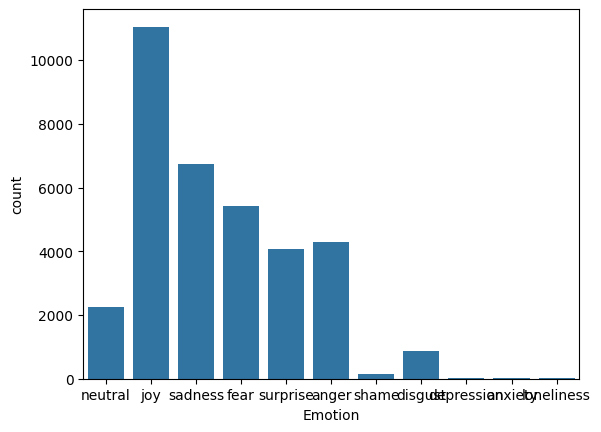

In [20]:
# Plot
sns.countplot(x='Emotion',data=df)

In [21]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
# User handles
#https://github.com/jcharistech/NeatText.jl
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
# df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [23]:
# Stopwords
df = df[df['Clean_Text'] != '']


#### We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [24]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
37,loneliness,"Loneliness is a common experience, and it's ok...","Loneliness common experience, okay feel way. C..."
38,loneliness,You're not alone in feeling lonely. If you're ...,"feeling lonely. comfortable, consider reaching..."
39,loneliness,"When feeling lonely, immersing yourself in act...","feeling lonely, immersing activities enjoy, li..."
40,loneliness,Creating a virtual hangout with friends or joi...,Creating virtual hangout friends joining onlin...


In [25]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

#### It is advisable to split before applying pipelines because it prevents data leakage.

In [26]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [27]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [28]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [29]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/home/nakul/Documents/projects/emotion-detection-chatbot/envs/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [30]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [31]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6281695531528083

In [32]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [33]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [34]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.67153013e-03, 3.52390287e-06, 1.40287001e-05, 3.60503312e-03,
        2.21805487e-02, 8.80721509e-01, 8.05656946e-06, 8.47851339e-05,
        2.11925210e-02, 1.05435621e-04, 7.04130280e-02]])

In [35]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'anxiety', 'depression', 'disgust', 'fear', 'joy',
       'loneliness', 'neutral', 'sadness', 'shame', 'surprise'],
      dtype=object)

In [36]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()